In [1]:
#importing the libraries
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt

from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import average_precision_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_curve
from sklearn.metrics import auc


import seaborn as sns
sns.set(style = 'ticks')

In [2]:
#Reading the data from car.data
df = pd.read_csv('C:/Users/Jewin/Desktop/Jovita-DataSciene/DATA/car.data',header=None)
print(df.dtypes)
df.head()

0    object
1    object
2    object
3    object
4    object
5    object
6    object
dtype: object


,0,1,2,3,4,5,6
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [3]:
# inserting column names 
df.columns = ['Buying','Maintenance','Doors','Persons','Luggage-Boot','Safety','Class']

In [8]:
df.dtypes

Buying          object
Maintenance     object
Doors           object
Persons         object
Luggage-Boot    object
Safety          object
Class           object
dtype: object

# Question:
Can we define the Class of a CAR based on factors like safety and maintenance?


In [9]:
df.head()

,Buying,Maintenance,Doors,Persons,Luggage-Boot,Safety,Class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [10]:
df.count()

Buying          1728
Maintenance     1728
Doors           1728
Persons         1728
Luggage-Boot    1728
Safety          1728
Class           1728
dtype: int64

# EDA
Transforming the Categorical features into encoded numerical values

In [11]:
#Target Class : Different categorical value in class
df['Class'].value_counts()

unacc    1210
acc       384
good       69
vgood      65
Name: Class, dtype: int64

In [12]:
categorical_feature_mask = df.dtypes==object
# filter categorical columns using mask and turn it into a list
categorical_cols = df.columns[categorical_feature_mask].tolist()
le = LabelEncoder()
df[categorical_cols] = df[categorical_cols].apply(lambda col: le.fit_transform(col))
df[categorical_cols].head(10)

,Buying,Maintenance,Doors,Persons,Luggage-Boot,Safety,Class
0,3,3,0,0,2,1,2
1,3,3,0,0,2,2,2
2,3,3,0,0,2,0,2
3,3,3,0,0,1,1,2
4,3,3,0,0,1,2,2
5,3,3,0,0,1,0,2
6,3,3,0,0,0,1,2
7,3,3,0,0,0,2,2
8,3,3,0,0,0,0,2
9,3,3,0,1,2,1,2


In [13]:
df.head()

,Buying,Maintenance,Doors,Persons,Luggage-Boot,Safety,Class
0,3,3,0,0,2,1,2
1,3,3,0,0,2,2,2
2,3,3,0,0,2,0,2
3,3,3,0,0,1,1,2
4,3,3,0,0,1,2,2


In [173]:
df['Class'].value_counts()

2    1210
0     384
1      69
3      65
Name: Class, dtype: int64

In [175]:
df.corr()

,Buying,Maintenance,Doors,Persons,Luggage-Boot,Safety,Class
Buying,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.051424
Maintenance,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.040194
Doors,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,-0.031327
Persons,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,-0.299468
Luggage-Boot,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.033184
Safety,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,-0.021044
Class,0.051424,0.040194,-0.031327,-0.299468,0.033184,-0.021044,1.000000


In [176]:
df.corr()['Class'].sort_values()

Persons        -0.299468
Doors          -0.031327
Safety         -0.021044
Luggage-Boot    0.033184
Maintenance     0.040194
Buying          0.051424
Class           1.000000
Name: Class, dtype: float64

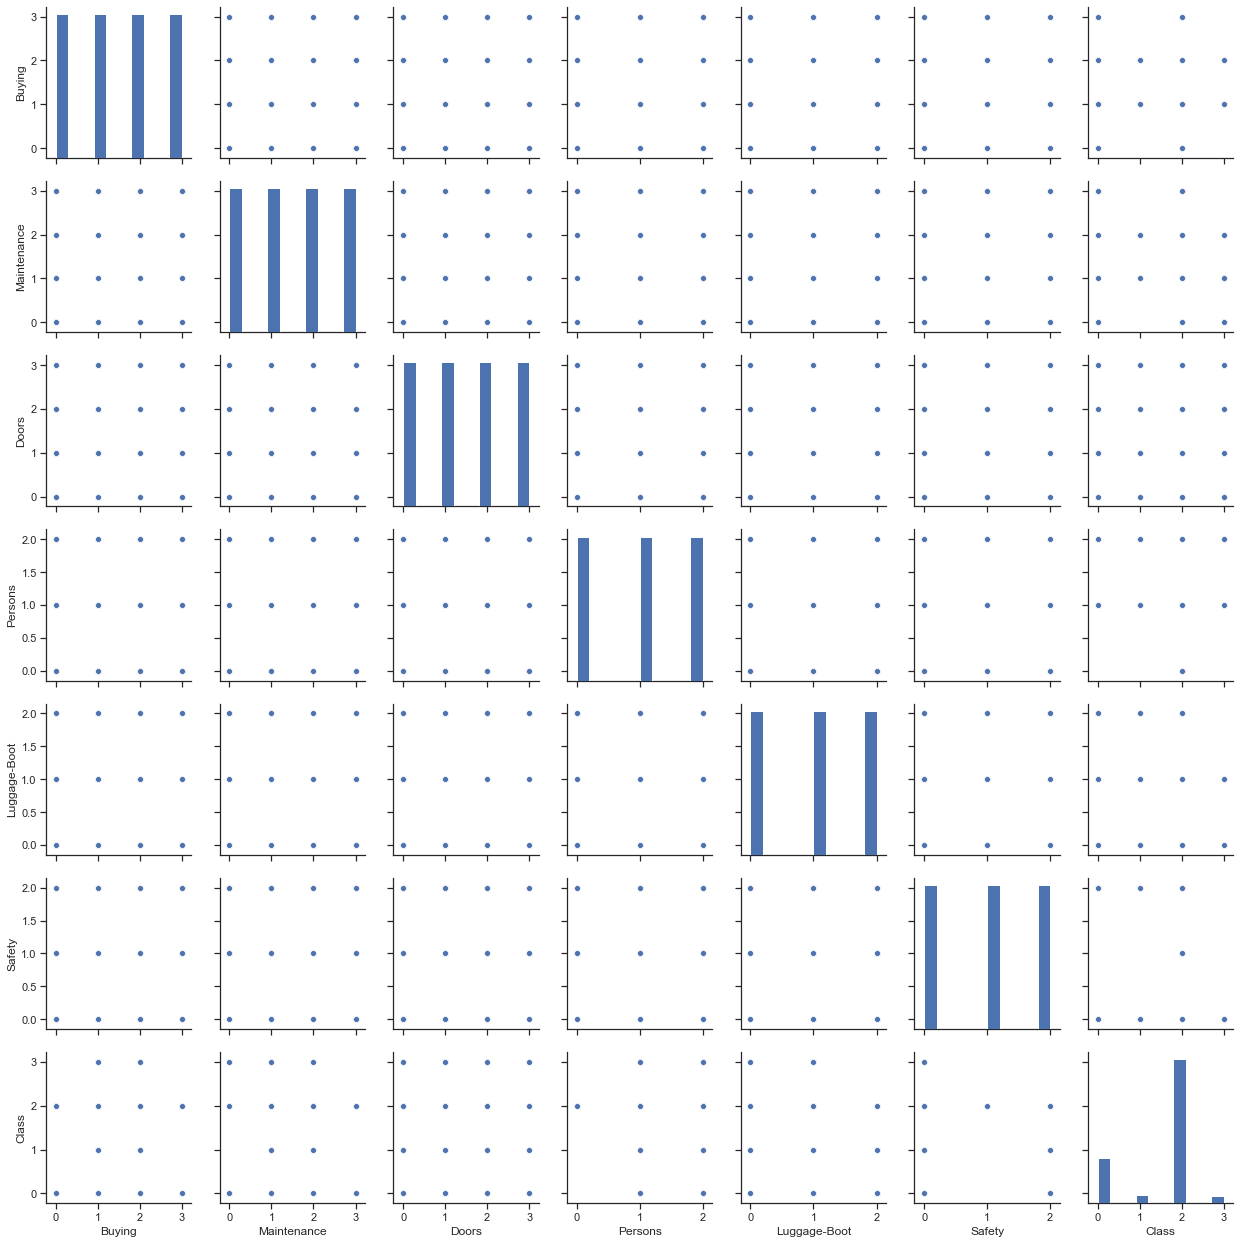

In [177]:
#Representing data in pair plots to understand the correlation between features
sns.pairplot(df)

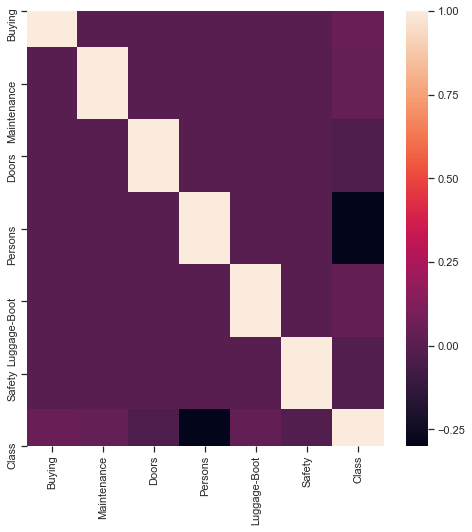

In [14]:
plt.figure(figsize=(8,8))
sns.heatmap(df.corr())

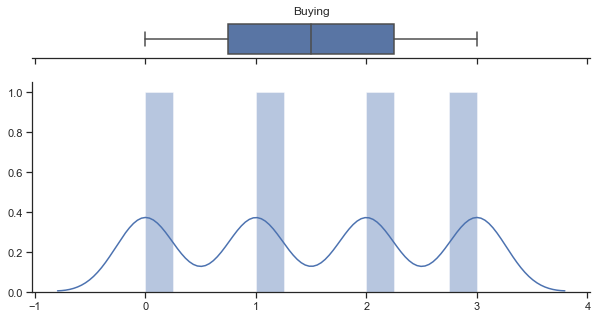

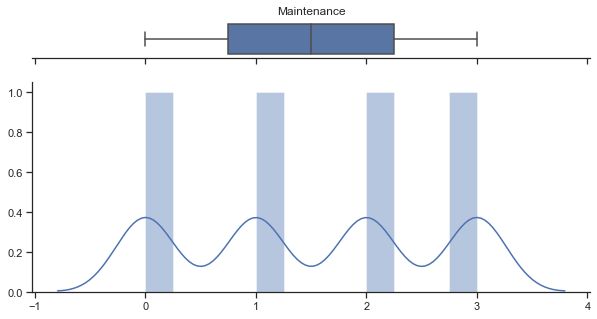

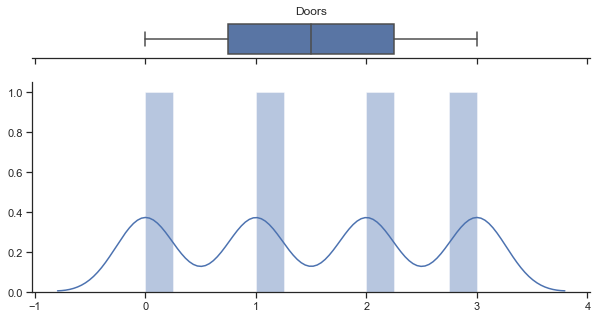

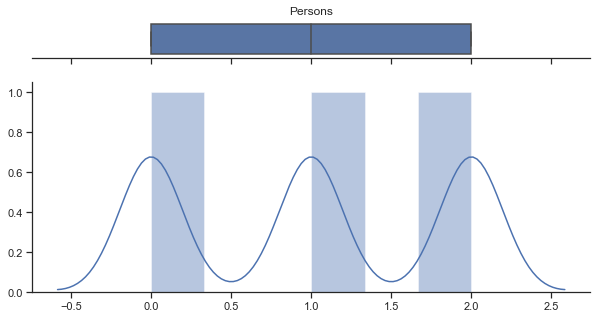

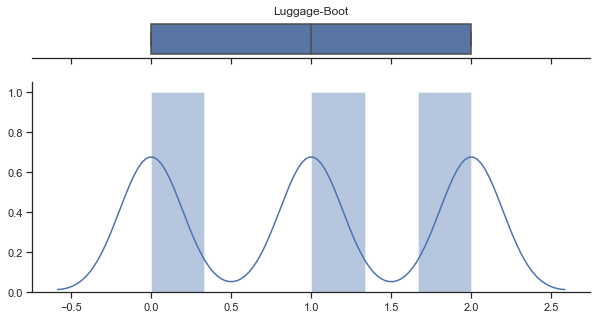

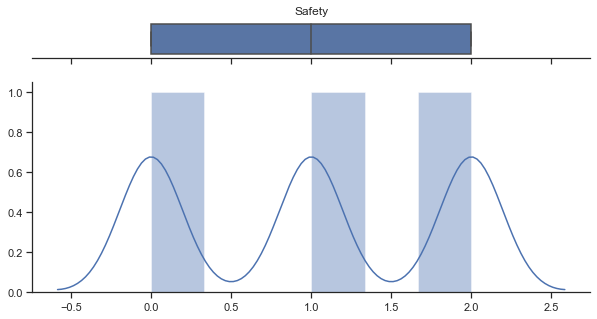

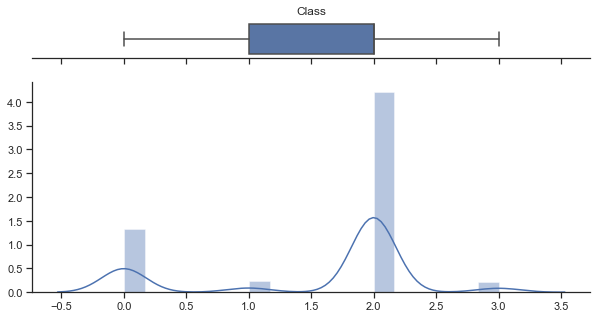

In [179]:
for c in df.columns:
    fig, ax = plt.subplots(2, 
                           figsize = (10, 5),
                           sharex = True, 
                           gridspec_kw = {'height_ratios': (0.15, 0.85)})

    ax_box = ax[0]
    ax_box = sns.boxplot(df[c], ax = ax_box)
    ax_box.set(title = c, yticks = [], xlabel = '')
    sns.despine(ax = ax_box, left = True)

    ax_hist = ax[1]
    ax_hist = sns.distplot(df[c], ax = ax_hist)
    ax_hist.set(xlabel = '')
    sns.despine(ax = ax_hist)

plt.show()

# Train and Test Split

60 % Training Data
20% Evaluation Data
20% Testing Data

In [180]:
Predictor_columns=['Buying','Maintenance','Doors','Persons','Luggage-Boot','Safety']
X=df[Predictor_columns]
y=df['Class']
X_training, X_test, y_training, y_test = train_test_split(X, y, test_size=0.20, random_state=42)
X_train, X_eval, y_train, y_eval = train_test_split(X_training, y_training, test_size=0.25, random_state=42)

# Training the model

In [181]:
clf = DecisionTreeClassifier(random_state=0)

In [182]:
clf.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=0, splitter='best')

In [183]:
print('Training Score: ',clf.score(X_train,y_train))
print('Test Score: ',clf.score(X_eval,y_eval))

Training Score:  1.0
Test Score:  0.9710982658959537


In [184]:
clf.predict(X_eval)

array([2, 0, 2, 2, 2, 0, 2, 2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 0, 2, 2,
       2, 2, 0, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 3, 0, 0, 2, 0, 2, 2, 2, 0,
       2, 0, 2, 0, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 2, 2, 2,
       2, 2, 2, 2, 0, 2, 2, 2, 1, 3, 2, 2, 0, 2, 2, 0, 2, 2, 0, 2, 2, 2,
       3, 0, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2, 3, 2, 3, 2, 2, 2,
       0, 2, 1, 2, 2, 2, 0, 2, 2, 2, 3, 1, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2,
       2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 0, 0, 2, 0, 2, 2, 1, 0, 0, 1, 0, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 0, 2, 2, 2, 2, 2, 0, 0, 2, 3, 2, 2, 0, 2,
       2, 2, 2, 3, 0, 2, 2, 2, 2, 2, 0, 2, 2, 2, 3, 2, 2, 2, 2, 0, 2, 2,
       0, 2, 2, 2, 0, 2, 3, 2, 0, 2, 0, 2, 2, 2, 1, 0, 2, 2, 0, 2, 0, 2,
       2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 0, 2, 2, 2, 2, 2, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 0, 0, 2, 3, 0, 2, 2, 0, 0, 0, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 1, 0, 0, 2, 2, 1, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 0, 3, 0, 2, 0, 3, 2, 2, 2, 2, 2, 2, 0, 3,

In [185]:
model = RandomForestClassifier()

In [186]:
model.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [187]:
print('Training Score: ',model.score(X_train,y_train))
print('Test Score: ',model.score(X_eval,y_eval))

Training Score:  0.999034749034749
Test Score:  0.9248554913294798


In [188]:
model.predict(X_eval)

array([2, 2, 2, 2, 2, 0, 2, 2, 2, 0, 0, 0, 2, 2, 2, 2, 0, 0, 2, 0, 2, 2,
       2, 2, 0, 2, 1, 2, 2, 2, 2, 0, 2, 2, 2, 3, 0, 0, 2, 0, 2, 2, 2, 0,
       2, 0, 2, 0, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 0, 3, 2, 2, 0, 2, 2, 0, 2, 2, 0, 2, 2, 2,
       3, 0, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2, 3, 0, 3, 2, 2, 2,
       0, 2, 1, 2, 2, 2, 2, 2, 2, 2, 3, 0, 2, 2, 2, 2, 2, 0, 2, 2, 0, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2, 0, 2, 2, 0, 0, 0, 1, 0, 2,
       2, 2, 2, 0, 0, 2, 0, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2, 0, 2, 2, 0, 2,
       2, 2, 2, 3, 1, 2, 2, 2, 2, 2, 0, 0, 2, 2, 3, 2, 0, 2, 2, 2, 2, 2,
       0, 2, 2, 2, 0, 2, 3, 2, 0, 2, 0, 2, 2, 0, 1, 2, 2, 2, 2, 2, 0, 2,
       2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 0, 2, 2, 2, 2, 2, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 0, 0, 2, 3, 0, 2, 2, 0, 1, 0, 2, 0, 2, 2, 0, 2,
       2, 2, 2, 2, 2, 1, 0, 0, 2, 2, 1, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 0, 0, 0, 2, 0, 3, 2, 2, 2, 2, 2, 0, 3, 3,

In [189]:
def show_summary_report(actual, prediction):

    if isinstance(actual, pd.Series):
        actual = actual.values.astype(int)
    prediction = prediction.astype(int)

    print('Accuracy : %.4f [TP / N] Proportion of predicted labels that match the true labels. Best: 1, Worst: 0' % accuracy_score(actual, prediction))
    print('Precision: %.4f [TP / (TP + FP)] Not to label a negative sample as positive.        Best: 1, Worst: 0' % precision_score(actual, prediction))
    print('Recall   : %.4f [TP / (TP + FN)] Find all the positive samples.                     Best: 1, Worst: 0' % recall_score(actual, prediction))
    print('ROC AUC  : %.4f                                                                     Best: 1, Worst: < 0.5' % roc_auc_score(actual, prediction))
    print('-' * 107)
    print('TP: True Positives, FP: False Positives, TN: True Negatives, FN: False Negatives, N: Number of samples')

    # Confusion Matrix
    mat = confusion_matrix(actual, prediction)

    # Precision/Recall
    precision, recall, _ = precision_recall_curve(actual, prediction)
    average_precision = average_precision_score(actual, prediction)
    
    # Compute ROC curve and ROC area
    fpr, tpr, _ = roc_curve(actual, prediction)
    roc_auc = auc(fpr, tpr)


    # plot
    fig, ax = plt.subplots(1, 3, figsize = (18, 6))
    fig.subplots_adjust(left = 0.02, right = 0.98, wspace = 0.2)

    # Confusion Matrix
    sns.heatmap(mat.T, square = True, annot = True, fmt = 'd', cbar = False, cmap = 'Blues', ax = ax[0])

    ax[0].set_title('Confusion Matrix')
    ax[0].set_xlabel('True label')
    ax[0].set_ylabel('Predicted label')
    
    # Precision/Recall
    step_kwargs = {'step': 'post'}
    ax[1].step(recall, precision, color = 'b', alpha = 0.2, where = 'post')
    ax[1].fill_between(recall, precision, alpha = 0.2, color = 'b', **step_kwargs)
    ax[1].set_ylim([0.0, 1.0])
    ax[1].set_xlim([0.0, 1.0])
    ax[1].set_xlabel('Recall')
    ax[1].set_ylabel('Precision')
    ax[1].set_title('2-class Precision-Recall curve')

    # ROC
    ax[2].plot(fpr, tpr, color = 'darkorange', lw = 2, label = 'ROC curve (AUC = %0.2f)' % roc_auc)
    ax[2].plot([0, 1], [0, 1], color = 'navy', lw = 2, linestyle = '--')
    ax[2].set_xlim([0.0, 1.0])
    ax[2].set_ylim([0.0, 1.0])
    ax[2].set_xlabel('False Positive Rate')
    ax[2].set_ylabel('True Positive Rate')
    ax[2].set_title('Receiver Operating Characteristic')
    ax[2].legend(loc = 'lower right')

    plt.show()

In [190]:
Decision_Tree=clf.predict(X_test)
Random_Forest=model.predict(X_test)

In [191]:
print('Decision Tree Score on Unseen data: ',clf.score(X_test,y_test))
print('Random Forest Score on Unseen Data: ',model.score(X_test,y_test))

Decision Tree Score on Unseen data:  0.9479768786127167
Random Forest Score on Unseen Data:  0.9161849710982659


In [194]:
mat1=confusion_matrix(y_test, Decision_Tree)
mat2=confusion_matrix(y_test, Random_Forest)

(4.0, 0.0)

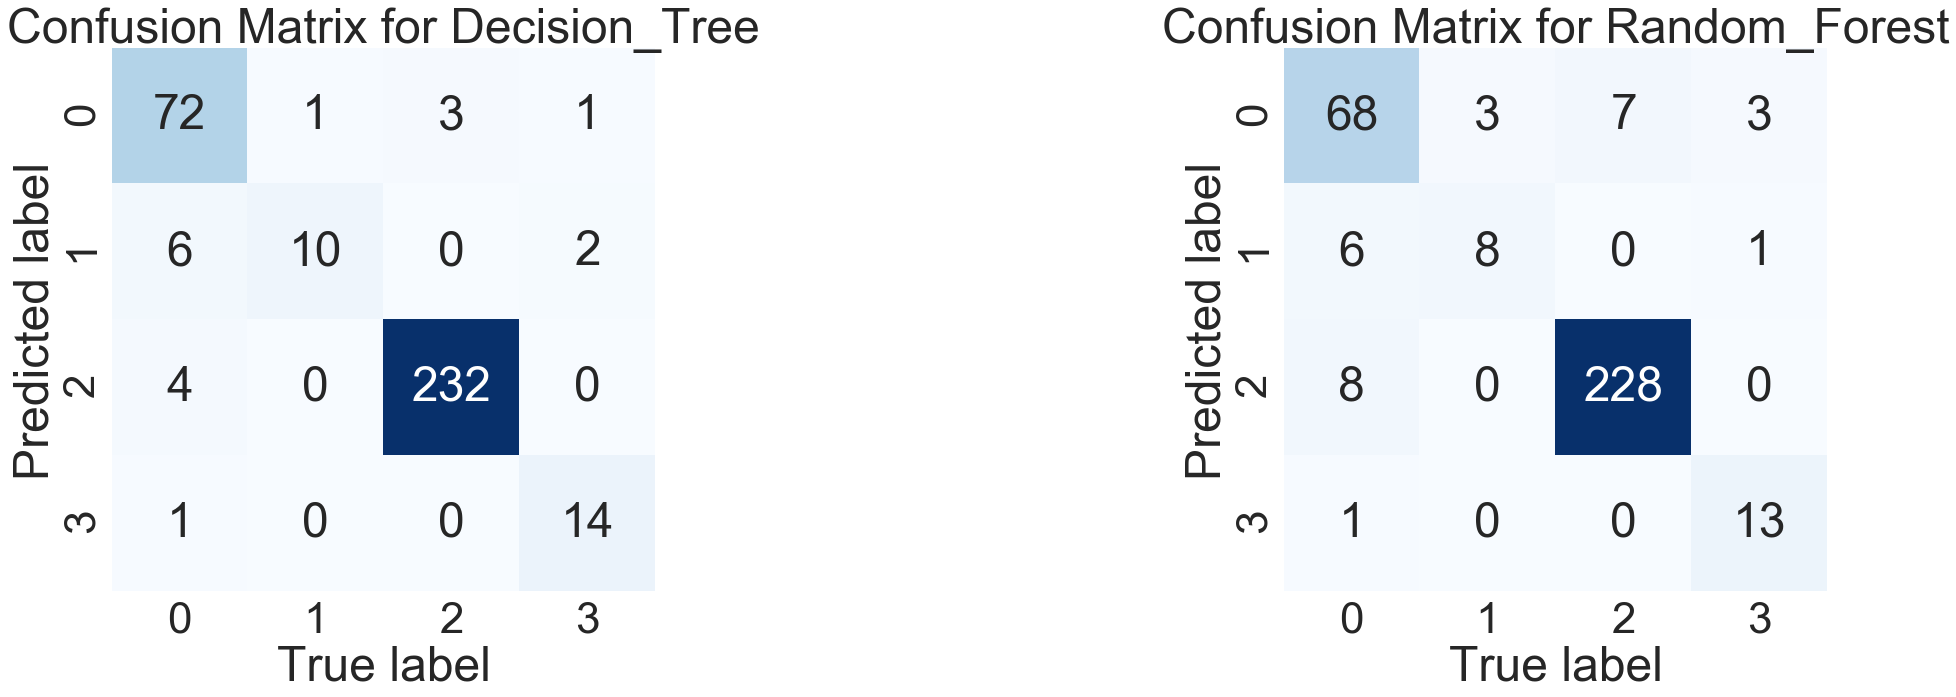

In [225]:
fig, ax = plt.subplots(1, 2, figsize = (30,10))
fig.subplots_adjust(left = 0.02, right = 0.98, wspace = 0.3)
sns.set(font_scale=4)
sns.heatmap(mat1.T, square = True, annot = True, fmt = 'd', cbar = False, cmap = 'Blues',ax=ax[0])
#sns.heatmap(mat)
ax[0].set_title('Confusion Matrix for Decision_Tree')
ax[0].set_xlabel('True label')
ax[0].set_ylabel('Predicted label')
ax[0].set_ylim(sorted(ax[0].get_xlim(), reverse=True))

sns.heatmap(mat2.T, square = True, annot = True, fmt = 'd', cbar = False, cmap = 'Blues',ax=ax[1])
#sns.heatmap(mat)
ax[1].set_title('Confusion Matrix for Random_Forest')
ax[1].set_xlabel('True label')
ax[1].set_ylabel('Predicted label')
ax[1].set_ylim(sorted(ax[1].get_xlim(), reverse=True))
    
    

In [227]:
from sklearn import preprocessing


In [228]:
Binary_yTest = preprocessing.label_binarize(y_test, classes=[0, 1, 2, 3])

In [230]:
Binary_Decision_Tree=preprocessing.label_binarize(Decision_Tree, classes=[0, 1, 2, 3])

In [232]:
average_precision_score(Binary_yTest, Binary_Decision_Tree, average='macro')

0.776835751537867